**Scapy** is a powerful Python library used for network packet manipulation. 

It allows you to create, send, capture, analyze, and manipulate network packets

In [ ]:
from scapy.all import *

# Create an IP packet with an ICMP layer
packet = IP(dst="8.8.8.8") / ICMP()

# Send the packet and wait for a response
response = sr1(packet, timeout=2)

# Print the response
if response:
    response.show()
else:
    print("No response received.")

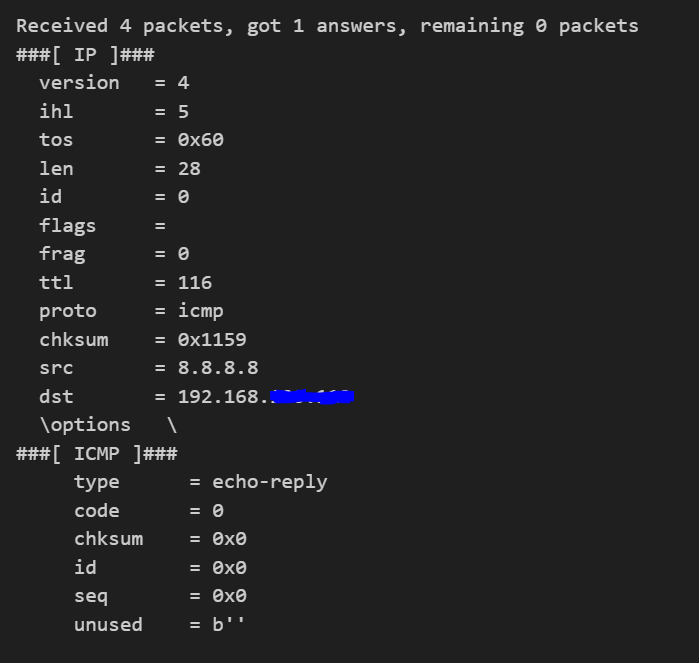

**Network Scanner**

In [ ]:
from scapy.all import ARP, Ether, srp

def scan(target_ip): 
    arp_request = ARP(pdst=target_ip) 
    broadcast = Ether(dst="ff:ff:ff:ff:ff:ff") 
    arp_request_broadcast = broadcast / arp_request 
    
    answered_list = srp(arp_request_broadcast, timeout=1, verbose=False)[0] 

    print("Available Devices:") 
    for sent, received in answered_list: 
        print(f"{received.psrc}\t\t{received.hwsrc}")

if __name__ == "__main__": 
    target = input("Enter target IP or IP range: ") 
    scan(target)